In [1]:
import numpy as np
import pandas as pd

from src import evaluate, plotutils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_DIR = "./data/"
CLINICAL_NOTES_FILE = DATA_DIR + "ClinNotes.csv"
MEDICAL_CONCEPTS_FILE = DATA_DIR + "MedicalConcepts.csv"

PROCESSDED_DATA_DIR = './processed_data/'
TFIDF_VECTOR_FILE = PROCESSDED_DATA_DIR + 'Tfidf_vector.npy'
TFIDF_VOCAB_FILE = PROCESSDED_DATA_DIR + 'Tfidf_vocab.npy'

# Use Case: Clustering
The document vectors can be used to do clustering for the documents. Clustering is a good unsupervised method to get some inital understanding of the data. In this notebook, I want to show the use case to get initial understanding of the data with clustering.

The clustering method we use will be K-Means. Due to the easy interpretaion of TF-IDF vector, it is very convenient (because we have the vocabulary!) for us to know the information of each cluster by the centroids. For other two vectrization methods, we can also do this by some unsupervised keyword extraction method, like RAKE or YAKE. But it is a bit beyond the scope of vectorization. So we will only showcase the result of TF-IDF below.

In [4]:
df_clinical = pd.read_csv(CLINICAL_NOTES_FILE)

In [5]:
vectors_tfidf = np.load(TFIDF_VECTOR_FILE)
vocab_tfidf = np.load(TFIDF_VOCAB_FILE, allow_pickle=True)

We will first do K-Means clustering of the dataset. The choice of k can be very problematic in practice. Here we just use 6 for simplicity.

In [6]:
%%time

kmeans = evaluate.kmeans_cluster(6, vectors_tfidf)

CPU times: total: 7.28 s
Wall time: 1.59 s


Below we will use the centroids of each cluster together with the vocabulary we get from the TF-IDF vectorizer, to plot the wordcloud of each cluster. The result is quite promising as we can get to know the topic of each cluster and basically each topic is quite clear.

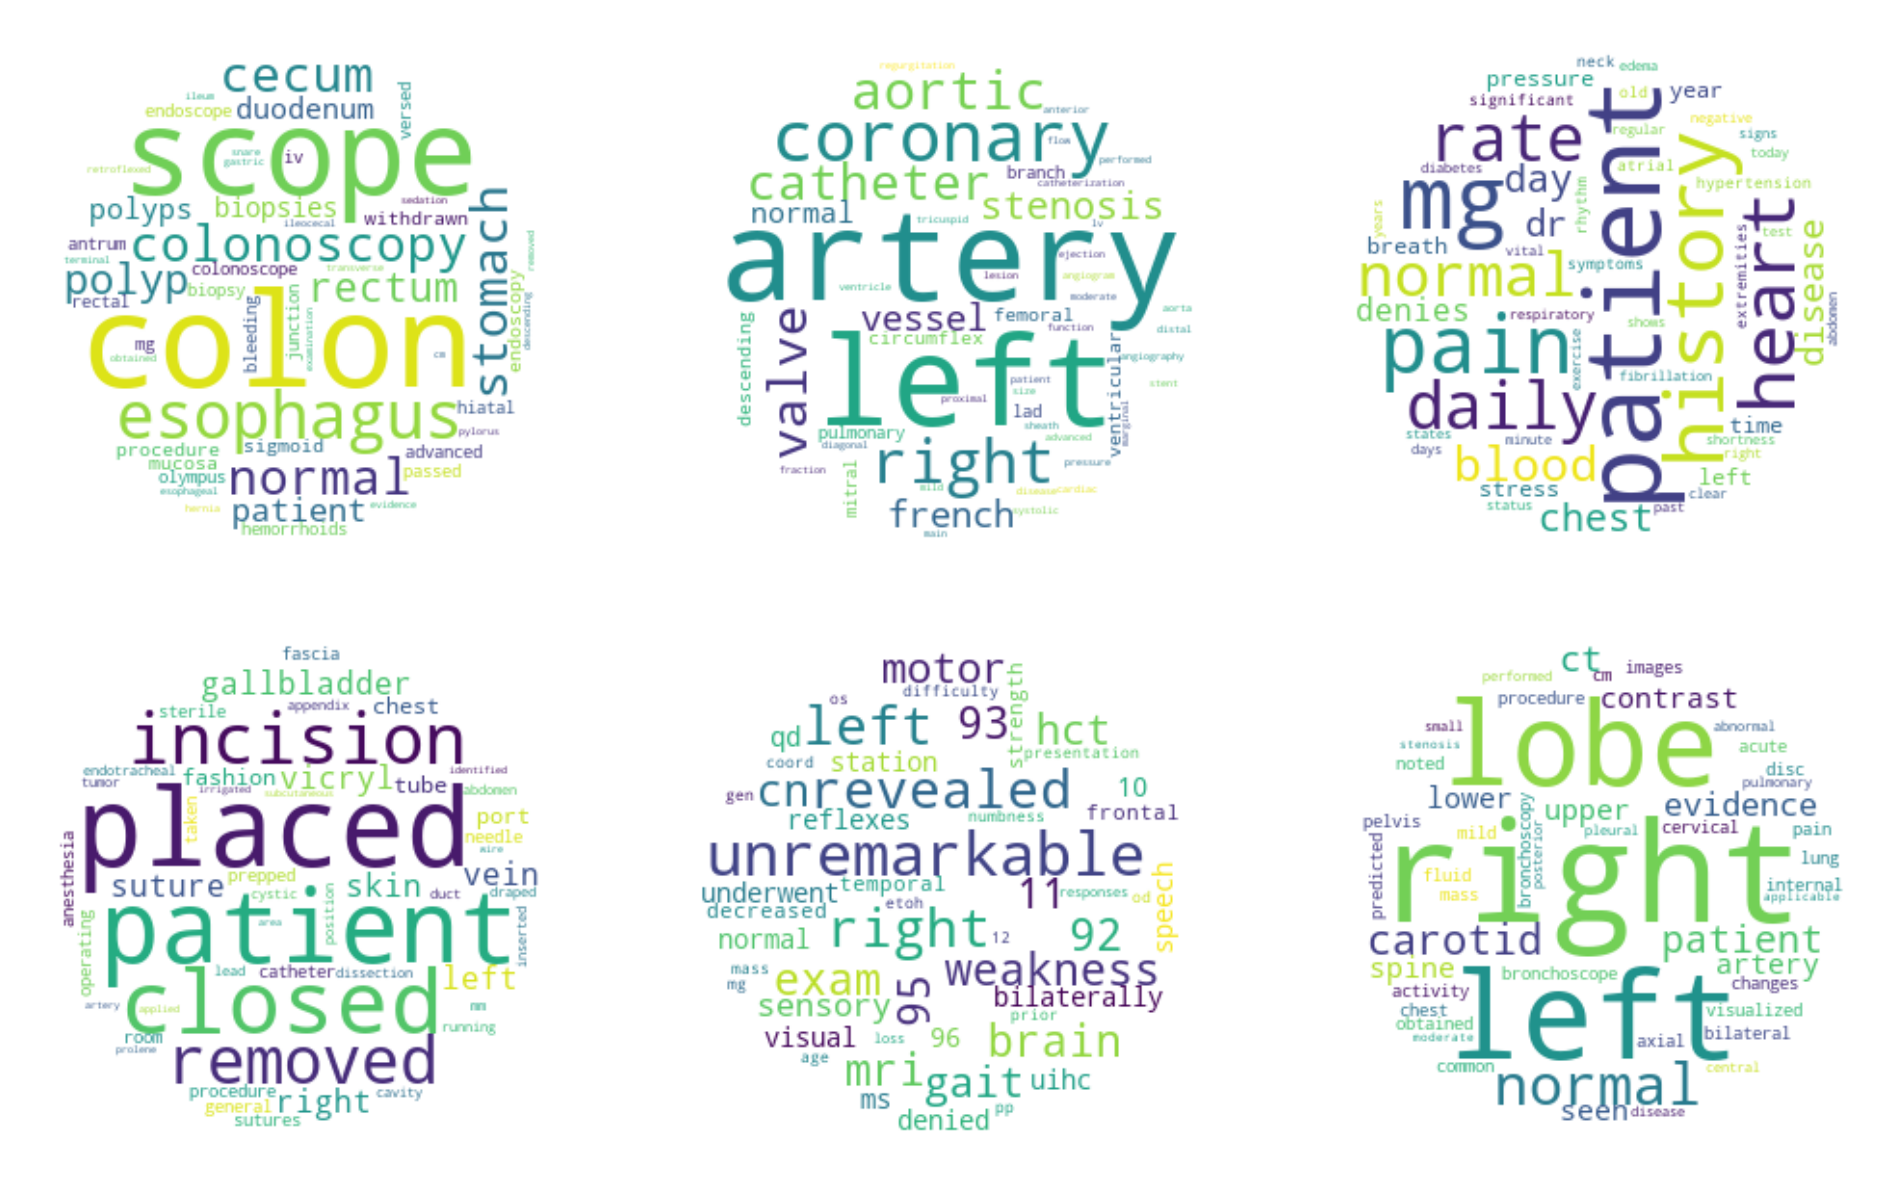

In [7]:
plotutils.plot_cluster_wordcloud(kmeans.cluster_centers_, vocab_tfidf, (2,3))